# KMEANS CLUSTERING : UNSUPERVISED LEARNING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
iris = load_iris()

In [24]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


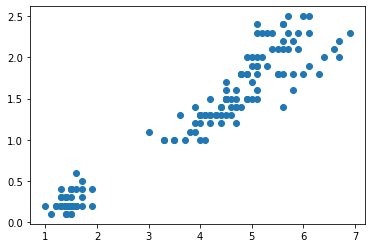

In [32]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [25]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
df['cluster'] = y_predicted
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


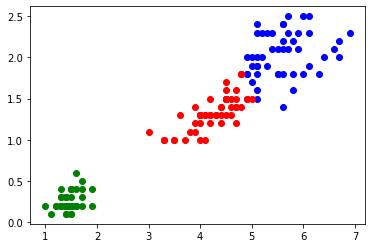

In [28]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='blue')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='red')

### SUM SQUARED ERROR

In [35]:
sse = []
k_range = range(1,10)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

Text(0, 0.5, 'SSE')

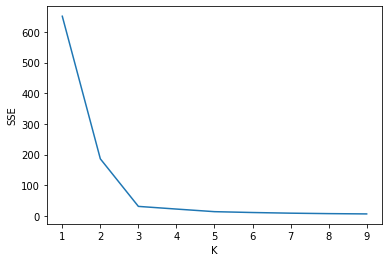

In [36]:
plt.plot(k_range,sse)
plt.xlabel('K')
plt.ylabel('SSE')

# NAIVE BAYES CLASIFIER ALGORITHM

In [40]:
from sklearn.datasets import load_wine
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [77]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [78]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)
df['target'] = wine.target

x_train, x_test, y_train, y_test = train_test_split(wine.data,wine.target,test_size=0.2)

model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [75]:
model.score(x_test,y_test)

1.0

In [65]:
score_lr = cross_val_score(LogisticRegression(),wine.data,wine.target)
score_svm = cross_val_score(SVC(),wine.data,wine.target)
score_rfc = cross_val_score(RandomForestClassifier(n_estimators=10),wine.data,wine.target)

c:\users\jishn\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\jishn\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [59]:
np.average(score_lr)

0.9555555555555555

In [60]:
np.average(score_svm)

0.6634920634920635

In [61]:
np.average(score_rfc)

0.9663492063492063

In [79]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [80]:
mnb.score(x_test,y_test)

0.8888888888888888

# HYPER PARAMETER TUNING

In [91]:
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [92]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df['target'] = digits.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [104]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model_params = {
    
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],            
        }
    }
}

In [105]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.898202,{'n_estimators': 10}
2,logistic_regression,0.922114,{'C': 1}
3,naive_bayes_gaussian,0.806928,{}
4,naive_bayes_multinomial,0.870350,{}
5,decision_tree,0.806916,{'criterion': 'entropy'}


In [106]:
scores = []

for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\users\jishn\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\users\jishn\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\users\jishn\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\users\jishn\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iteratio

,model,best_score,best_params
0,svm,0.947697,"{'kernel': 'linear', 'C': 1}"
1,random_forest,0.898753,{'n_estimators': 10}
2,logistic_regression,0.922114,{'C': 1}
3,naive_bayes_gaussian,0.806928,{}
4,naive_bayes_multinomial,0.870350,{}
5,decision_tree,0.806917,{'criterion': 'entropy'}
